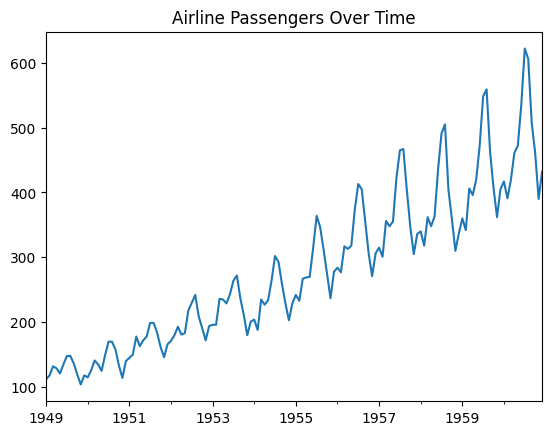

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.datasets import get_rdataset

# Load the AirPassengers dataset directly
data = get_rdataset("AirPassengers").data
df = pd.Series(data['value'].values, index=pd.date_range(start='1949-01', periods=len(data['value']), freq='M'))
df.index = pd.DatetimeIndex(df.index).to_period('M')

# Plot the Data
df.plot()
#print(df.head())
plt.title('Airline Passengers Over Time')
plt.show()



In [2]:
# Check for Stationarity
result = adfuller(df)
print('ADF Statistic:', result[0])
print('p-value:', result[1])



ADF Statistic: 0.8153688792060472
p-value: 0.991880243437641


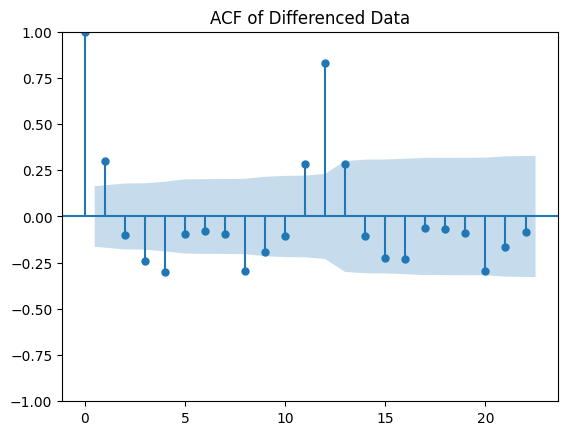

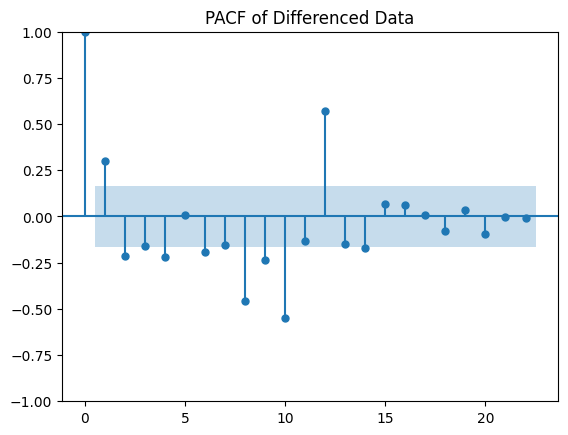

In [3]:
# Differencing to make the series stationary if necessary
if result[1] > 0.05:
    df = df.diff().dropna()

# Plot ACF and PACF
plot_acf(df.dropna())
plt.title('ACF of Differenced Data')
plt.show()

plot_pacf(df.dropna())
plt.title('PACF of Differenced Data')
plt.show()



In [4]:
# Fit ARIMA Model
# Replace p, d, q with the identified order parameters after examining the ACF and PACF plots
p = 2  # example value
d = 1  # differencing is often necessary for this dataset
q = 2  # example value

model = ARIMA(df, order=(p, d, q))
model_fit = model.fit()

best_bic = np.inf
best_order = (p, d, q)

# Define the range for p, d, q
p_range = range(6, 18)
d_range = range(1, 3)
q_range = range(1, 5)

# Iterate over different combinations of p, d, q
for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                model = ARIMA(df, order=(p, d, q))
                model_fit = model.fit()
                bic = model_fit.bic
                print(f"BIC({p}, {d}, {q}) = {bic}")

                if bic < best_bic:
                    best_bic = bic
                    best_order = (p, d, q)
                    best_model = model_fit
            except:
                continue

print(f"Best BIC: {best_bic}")
print(f"Best order: {best_order}")

# Model Summary
print(best_model.summary())

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(1, 1, 1) = 1407.7964631687807
BIC(1, 1, 2) = 1403.7328416579633


/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(1, 1, 3) = 1407.2478327093786
BIC(1, 1, 4) = 1411.9544079261498
BIC(1, 2, 1) = 1454.0185061531322


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(1, 2, 2) = 1460.573483521057


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(1, 2, 3) = 1422.0161374194367


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


BIC(1, 2, 4) = 1418.002956802273
BIC(2, 1, 1) = 1405.7102298573095


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(2, 1, 2) = 1407.4371374796783


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(2, 1, 3) = 1412.1658545040882


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(2, 1, 4) = 1391.8903748608243
BIC(2, 2, 1) = 1450.524762922034
BIC(2, 2, 2) = 1451.9875918735315


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


BIC(2, 2, 3) = 1419.778405835633
BIC(2, 2, 4) = 1421.6197613559184
BIC(3, 1, 1) = 1407.1567230847586


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(3, 1, 2) = 1410.8951024036173
BIC(3, 1, 3) = 1410.8462292077124


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


BIC(3, 1, 4) = 1398.903358708983
BIC(3, 2, 1) = 1451.6227584796507


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(3, 2, 2) = 1455.4372220424173


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(3, 2, 3) = 1422.693276967751


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(3, 2, 4) = 1418.9086140277323
BIC(4, 1, 1) = 1403.0141518361415
BIC(4, 1, 2) = 1401.988093237978


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(4, 1, 3) = 1400.112137015498


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


BIC(4, 1, 4) = 1401.5628203691726
BIC(4, 2, 1) = 1437.1503623934989


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(4, 2, 2) = 1443.5938939540176


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC(4, 2, 3) = 1419.851221860156


/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


BIC(4, 2, 4) = 1425.2103066514687
Best BIC: 1391.8903748608243
Best order: (2, 1, 4)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  143
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -678.600
Date:                Thu, 16 Nov 2023   AIC                           1371.200
Time:                        11:11:58   BIC                           1391.890
Sample:                    02-28-1949   HQIC                          1379.607
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7199      0.020    -88.089      0.000      -1.758      -1.682
ar.L2         -0.9930      0.023    -43.529   

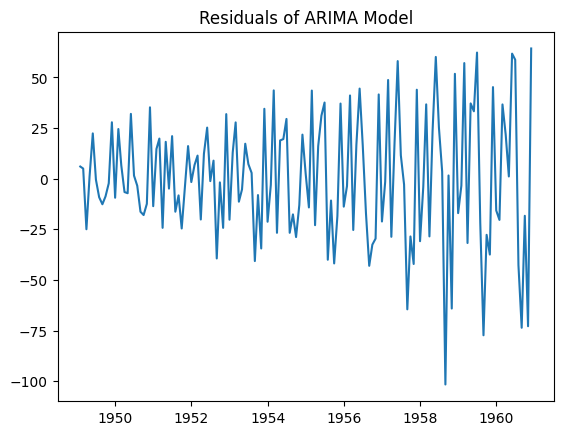

Forecast: 1961-01    43.122996
1961-02    -2.485775
1961-03     4.678390
1961-04    -4.262319
1961-05     6.760728
1961-06    -0.103545
1961-07     4.736120
1961-08     1.041093
1961-09     2.995374
1961-10     2.189372
1961-11     1.775736
1961-12     2.977559
Freq: M, Name: predicted_mean, dtype: float64


In [5]:
# Plot Residuals
residuals = pd.DataFrame(model_fit.resid)
plt.figure()
plt.plot(residuals.index.to_timestamp(), residuals[0])
plt.title('Residuals of ARIMA Model')
plt.show()


# Forecasting
forecast = model_fit.forecast(steps=12)
print('Forecast:', forecast)

# Evaluate Model
# You would typically have test data or perform cross-validation 
# to evaluate your model's performance